<div class="alert alert-block alert-info">Working with TripAdvisor customer review data for the <b> Best Western Plus Pioneer Square Hotel Downtown Hotel</b> in Seattle, Washington. Using the load method in the json module in Python to parse a JSON file with result being a Python dictionary. Then by using dictionary methods extracting the list of reviews for the hotel and then use String methods to get information from within the comments made by the users.</div>

In [1]:
# Installing TextBlob
!pip install TextBlob

### Importing all the modules we are going to need

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from numpy import mean   

import nltk
from nltk.corpus import stopwords
from nltk import bigrams
from textblob import TextBlob

### Dictionaries and Dict Methods

The hotel data is contained in the (json) file `hotel_reviews.json`. The data includes some information about the hotel, and a number of hotel reviews made by people who (we assume) stayed there. 

In [3]:
market_dict = {}  # create an empty dictionary
market_dict['market_name'] = 'Foods R Us'
market_dict

{'market_name': 'Foods R Us'}

Updating the dictionary

In [4]:
market_dict.update({'market_address': '123 Main Street', 'market_phone': '(212)555-6789'})
market_dict

{'market_name': 'Foods R Us',
 'market_address': '123 Main Street',
 'market_phone': '(212)555-6789'}

### Adding a key/value pair to the <b><i>market_dict</i></b> dictionary defined above. 

In [5]:
fruit_dict = {"apples":123,"oranges":98,"pears":53}
# Adding a key/value pair to the dictionary where the key is "fruits" and the value fruit_dict
market_dict['fruits']=fruit_dict

# displaying the three keys: 'apples', 'oranges' and 'pears'.
print(market_dict['fruits'].keys())

dict_keys(['apples', 'oranges', 'pears'])


### Examining a JSON File

In [6]:
# set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
import json
#with open('../Data Files/hotel_reviews.json') as json_data:
with open('hotel_reviews.json') as json_data:
    hotel_data = json.load(json_data,) 
hotel_data

{'Reviews': [{'Ratings': {'Service': '4',
    'Cleanliness': '5',
    'Overall': '5.0',
    'Value': '4',
    'Sleep Quality': '4',
    'Rooms': '5',
    'Location': '5'},
   'AuthorLocation': 'Boston',
   'Title': '“Excellent Hotel & Location”',
   'Author': 'gowharr32',
   'ReviewID': 'UR126946257',
   'Content': 'We enjoyed the Best Western Pioneer Square. My husband and I had a room with a king bed and it was clean, quiet, and attractive. Our sons were in a room with twin beds. Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. But later hotels on the trip made them appreciate this one more. We loved the old wood center staircase. Breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. Location was great. We could walk to shops and restaurants as well as transportation. Pike Market was a reasonable walk. We enjoyed the nearby Gold Rush Museum. Very, very happy with our stay. Staff wa

The structure of `hotel_data` is a bit complicated but it is divided into two parts: a **HotelInfo** "section" (i.e. the value of the `'HotelInfo'` key) and the **Reviews** "section" (the value of the `'Reviews'` key).

In [8]:
hotel_data.keys()

dict_keys(['Reviews', 'HotelInfo'])

In [9]:
hotel_info = hotel_data['HotelInfo']
hotel_info

{'Name': 'BEST WESTERN PLUS Pioneer Square Hotel',
 'HotelURL': '/ShowUserReviews-g60878-d72572-Reviews-BEST_WESTERN_PLUS_Pioneer_Square_Hotel-Seattle_Washington.html',
 'Price': '$117 - $189*',
 'Address': '<address class="addressReset"> <span rel="v:address"> <span dir="ltr"><span class="street-address" property="v:street-address">77 Yesler Way</span>, <span class="locality"><span property="v:locality">Seattle</span>, <span property="v:region">WA</span> <span property="v:postal-code">98104-2530</span></span> </span> </span> </address>',
 'HotelID': '72572',
 'ImgURL': 'http://media-cdn.tripadvisor.com/media/ProviderThumbnails/dirs/51/f5/51f5d5761c9d693626e59f8178be15442large.jpg'}

In [10]:
# Checking he first two reviews (dictionaries) in the list...
hotel_data['Reviews'][:2]

[{'Ratings': {'Service': '4',
   'Cleanliness': '5',
   'Overall': '5.0',
   'Value': '4',
   'Sleep Quality': '4',
   'Rooms': '5',
   'Location': '5'},
  'AuthorLocation': 'Boston',
  'Title': '“Excellent Hotel & Location”',
  'Author': 'gowharr32',
  'ReviewID': 'UR126946257',
  'Content': 'We enjoyed the Best Western Pioneer Square. My husband and I had a room with a king bed and it was clean, quiet, and attractive. Our sons were in a room with twin beds. Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. But later hotels on the trip made them appreciate this one more. We loved the old wood center staircase. Breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. Location was great. We could walk to shops and restaurants as well as transportation. Pike Market was a reasonable walk. We enjoyed the nearby Gold Rush Museum. Very, very happy with our stay. Staff was helpful and knowledge

In [11]:
reviews = hotel_data['Reviews'] # list of reviews
type(reviews) # checking that it is a list

list

In [12]:
print("There are",len(reviews),"reviews altogether.")

There are 233 reviews altogether.


In [13]:
# displaying first review
first_review = reviews[0] 
first_review

{'Ratings': {'Service': '4',
  'Cleanliness': '5',
  'Overall': '5.0',
  'Value': '4',
  'Sleep Quality': '4',
  'Rooms': '5',
  'Location': '5'},
 'AuthorLocation': 'Boston',
 'Title': '“Excellent Hotel & Location”',
 'Author': 'gowharr32',
 'ReviewID': 'UR126946257',
 'Content': 'We enjoyed the Best Western Pioneer Square. My husband and I had a room with a king bed and it was clean, quiet, and attractive. Our sons were in a room with twin beds. Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. But later hotels on the trip made them appreciate this one more. We loved the old wood center staircase. Breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. Location was great. We could walk to shops and restaurants as well as transportation. Pike Market was a reasonable walk. We enjoyed the nearby Gold Rush Museum. Very, very happy with our stay. Staff was helpful and knowledgeable.',
 'Da

In [14]:
# displaying first review's ratings only
first_review_ratings = first_review['Ratings']
first_review_ratings

{'Service': '4',
 'Cleanliness': '5',
 'Overall': '5.0',
 'Value': '4',
 'Sleep Quality': '4',
 'Rooms': '5',
 'Location': '5'}

In [15]:
print("The first review's author is", first_review['Author'])
print(f"{first_review['Author']}'s' overall rating for {hotel_data['HotelInfo']['Name']} was {reviews[0]['Ratings']['Overall']}")

The first review's author is gowharr32
gowharr32's' overall rating for BEST WESTERN PLUS Pioneer Square Hotel was 5.0


In [16]:
print(first_review['Author'],"made the following comments:",'\n')
print(first_review['Content'])

gowharr32 made the following comments: 

We enjoyed the Best Western Pioneer Square. My husband and I had a room with a king bed and it was clean, quiet, and attractive. Our sons were in a room with twin beds. Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. But later hotels on the trip made them appreciate this one more. We loved the old wood center staircase. Breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. Location was great. We could walk to shops and restaurants as well as transportation. Pike Market was a reasonable walk. We enjoyed the nearby Gold Rush Museum. Very, very happy with our stay. Staff was helpful and knowledgeable.


### Creating a List with reviews

In [17]:
comment_lst = []  # will contain the review strings
for review in reviews:
    comment_lst.append(review['Content'])

In [18]:
len(comment_lst) # contains 233 comments--one for each reviewer

233

In [19]:
first_comment=comment_lst[0]
print("The first comment in the comment list is:",'\n')
print(first_comment)

The first comment in the comment list is: 

We enjoyed the Best Western Pioneer Square. My husband and I had a room with a king bed and it was clean, quiet, and attractive. Our sons were in a room with twin beds. Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. But later hotels on the trip made them appreciate this one more. We loved the old wood center staircase. Breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. Location was great. We could walk to shops and restaurants as well as transportation. Pike Market was a reasonable walk. We enjoyed the nearby Gold Rush Museum. Very, very happy with our stay. Staff was helpful and knowledgeable.


### Using string methods

In [20]:
# Creating a new string with all characters made lower case
first_comment.lower()

'we enjoyed the best western pioneer square. my husband and i had a room with a king bed and it was clean, quiet, and attractive. our sons were in a room with twin beds. their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. but later hotels on the trip made them appreciate this one more. we loved the old wood center staircase. breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. location was great. we could walk to shops and restaurants as well as transportation. pike market was a reasonable walk. we enjoyed the nearby gold rush museum. very, very happy with our stay. staff was helpful and knowledgeable.'

In [21]:
# Finding how many times the string "we" is mentioned in the comments.
first_comment.count("we")

2

In [22]:
# Searching a "case-insensitive" of instances of "we"
first_comment.lower().count("we")  

7

### Completing the loop below to display the number of times "bathroom" is contained within the text of the reviews for this hotel.

In [23]:
counter = 0
for review in comment_lst:
    # Inserting code in the for loop body to determine the number of times "bathroom" appears 
    # in the current review and increment the counter variable accordingly.
    if review.count("bathroom") > 0: 
        counter += 1
        
# Printing using an f-string
print(f"The word 'bathroom' occurs {counter} times in the reviews for this hotel.")

The word 'bathroom' occurs 26 times in the reviews for this hotel.


### Printing the number of "wordy" comments. A comment is considered "wordy" if it contains more than 100 words. 

In [24]:
counter = 0
for review in comment_lst:
    # TODO: Insert code in the for loop body to get the number of "wordy" comments.
    if len(review.split()) > 100:
        counter += 1


# Print the number of wordy comments.
print(f'There are {counter} wordy comments.')

There are 128 wordy comments.


Iterating over the `reviews` dictionary again this time saving with name of the reviewer together with the comments (in a dictionary).

### Creating a list of dictionaries (<b><i>ar_dict</i></b>), where each dictionary has two keys: "<b><i>Author</i></b>" and "<b><i>Comments</i></b>", by iterating over the list of reviews and for each review constructing a dictionary containing the author's name and comments and then appending it to the list of dictionaries we are creating.</div>

In [25]:
ar_lst = []
for review in reviews:
    ar_dict = {"Author":review['Author'], "Comments": review['Content']}
    ar_lst.append(ar_dict)
print(f'There are {len(ar_lst)} elements in the list.')

There are 233 elements in the list.


In [26]:
# Displaying the data from the first dictionary in the list.

first_review = ar_lst[0]
print(f"{first_review['Author']}, said this",'\n')
#print(first_review['Author'],"said this:",'\n')
print(first_review['Comments'])

gowharr32, said this 

We enjoyed the Best Western Pioneer Square. My husband and I had a room with a king bed and it was clean, quiet, and attractive. Our sons were in a room with twin beds. Their room was in the corner on the main street and they said it was a little noisier and the neon light shone in. But later hotels on the trip made them appreciate this one more. We loved the old wood center staircase. Breakfast was included and everyone was happy with waffles, toast, cereal, and an egg meal. Location was great. We could walk to shops and restaurants as well as transportation. Pike Market was a reasonable walk. We enjoyed the nearby Gold Rush Museum. Very, very happy with our stay. Staff was helpful and knowledgeable.


Geting the list of words in each review by remove punctuation from the comment strings. 

In [27]:
import re

phone = "2004-959-559 # This is Phone Number"

# Deleting Python-style comments
num = re.sub(r'#.*$', "", phone)
print("Phone Num : ", num)

# Removing anything other than digits
num = re.sub(r'\D', "", phone)    
print("Phone Num : ", num)

Phone Num :  2004-959-559 
Phone Num :  2004959559


In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Iterating over <b><i>ar_list</i></b> and printing the name of each reviewer (author) and the total number of *different*, i.e. *unique*, words in his comments. As part of the process of counting *unique* words in each comment, removing all punctuation using `re.sub`. Saving the resulting string to a list: `comments`. </b> 
    
</div>

In [29]:
counter = 0
from collections import Counter
import re
comments = []
for review in ar_lst:
    # Getting the number of words in the current review variable.
    comment_clean = re.sub("[^a-zA-Z\d\s:]", " ", review["Comments"].lower())
    comments.append(comment_clean)
    list_of_comment = comment_clean.split()
    unique_words = len(Counter(list_of_comment).keys())
    # Printing the author's name and the number of (unique) words in his/her review 
    print(f'{review["Author"]} used {unique_words} unique words')

    
    
    
    

gowharr32 used 87 unique words
Nancy W used 84 unique words
Janet H used 44 unique words
TimothyFlorida used 68 unique words
KarenArmstrong_BC used 106 unique words
Shane33333 used 52 unique words
Bnkruzn used 15 unique words
Teacherbear used 54 unique words
CandyGnomad used 50 unique words
idahosandy used 16 unique words
CW2S used 145 unique words
jimmy62_11 used 78 unique words
BoulderIllini used 129 unique words
funlovingdad used 104 unique words
suntraveler222 used 205 unique words
rosariodurao used 39 unique words
Jody R used 87 unique words
Tasha M used 27 unique words
Roy C used 88 unique words
MikeGB2 used 107 unique words
Jennie S used 54 unique words
mcdonothing used 80 unique words
SWanjiru used 108 unique words
trish0 used 50 unique words
txlnstr used 25 unique words
mydogisfat used 46 unique words
DaddyHoward used 96 unique words
BCisBeautiful used 121 unique words
wildorchid416 used 174 unique words
JCPCG used 82 unique words
quilter1975 used 51 unique words
Zyg022 used 6

### Analyzing the Review text

In [30]:
# starting with the list of Reviews which is in a free text format 
type(comments)
len(comments) # Number of comments
comments[:3] # displaying the first three comments in the list

list

233

['we enjoyed the best western pioneer square  my husband and i had a room with a king bed and it was clean  quiet  and attractive  our sons were in a room with twin beds  their room was in the corner on the main street and they said it was a little noisier and the neon light shone in  but later hotels on the trip made them appreciate this one more  we loved the old wood center staircase  breakfast was included and everyone was happy with waffles  toast  cereal  and an egg meal  location was great  we could walk to shops and restaurants as well as transportation  pike market was a reasonable walk  we enjoyed the nearby gold rush museum  very  very happy with our stay  staff was helpful and knowledgeable ',
 'great visit to seattle thanks to our stay at the best western pioneer square  the hotel was reasonably priced and close to everything we wanted to see   ferry ride  underground tour  klondike museum  short walk to pike market and other shopping  the staff was amazingly helpful and a

In [31]:
# breaking out the Reviews into words
my_words = [line.lower().split() for line in comments]

# displaying the first 10 words in the first 5 comments
for words in my_words[:5]:
    print(words[:10])

['we', 'enjoyed', 'the', 'best', 'western', 'pioneer', 'square', 'my', 'husband', 'and']
['great', 'visit', 'to', 'seattle', 'thanks', 'to', 'our', 'stay', 'at', 'the']
['great', 'location', 'short', 'walk', 'from', 'amtrak', 'station', 'link', 'or', 'to']
['accommodation', 'in', 'seattle', 'can', 'be', 'expensive', 'this', 'hotel', 'is', 'very']
['very', 'cool', 'old', 'building', 'in', 'a', 'great', 'location', 'check', 'in']


In [32]:
import itertools
import collections
import nltk
from nltk.corpus import stopwords

In [33]:

# preparing the words for analysis
words_total = list(itertools.chain(*my_words))

type(words_total)
words_total[:20] # displaying the first 20 words in the comments


list

['we',
 'enjoyed',
 'the',
 'best',
 'western',
 'pioneer',
 'square',
 'my',
 'husband',
 'and',
 'i',
 'had',
 'a',
 'room',
 'with',
 'a',
 'king',
 'bed',
 'and',
 'it']

In [34]:
# Finding stopwords
count_words = collections.Counter(words_total)
count_words.most_common(20)

[('the', 2108),
 ('and', 1194),
 ('a', 893),
 ('to', 864),
 ('was', 682),
 ('of', 505),
 ('hotel', 504),
 ('we', 497),
 ('is', 468),
 ('in', 462),
 ('i', 428),
 ('for', 359),
 ('it', 328),
 ('very', 280),
 ('this', 260),
 ('room', 256),
 ('with', 254),
 ('at', 229),
 ('were', 223),
 ('you', 211)]

In [35]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# comes with 179 stopwords
len(stop_words)
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/testcomputer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

179

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Removing the stopwords from the list.

In [36]:
my_final = [[word for word in count_words if not word in stop_words]
              for count_words in my_words]
my_final

[['enjoyed',
  'best',
  'western',
  'pioneer',
  'square',
  'husband',
  'room',
  'king',
  'bed',
  'clean',
  'quiet',
  'attractive',
  'sons',
  'room',
  'twin',
  'beds',
  'room',
  'corner',
  'main',
  'street',
  'said',
  'little',
  'noisier',
  'neon',
  'light',
  'shone',
  'later',
  'hotels',
  'trip',
  'made',
  'appreciate',
  'one',
  'loved',
  'old',
  'wood',
  'center',
  'staircase',
  'breakfast',
  'included',
  'everyone',
  'happy',
  'waffles',
  'toast',
  'cereal',
  'egg',
  'meal',
  'location',
  'great',
  'could',
  'walk',
  'shops',
  'restaurants',
  'well',
  'transportation',
  'pike',
  'market',
  'reasonable',
  'walk',
  'enjoyed',
  'nearby',
  'gold',
  'rush',
  'museum',
  'happy',
  'stay',
  'staff',
  'helpful',
  'knowledgeable'],
 ['great',
  'visit',
  'seattle',
  'thanks',
  'stay',
  'best',
  'western',
  'pioneer',
  'square',
  'hotel',
  'reasonably',
  'priced',
  'close',
  'everything',
  'wanted',
  'see',
  'ferry

In [37]:
all_words = list(itertools.chain(*my_final))
counts_all = collections.Counter(all_words)
counts_all.most_common(20)

[('hotel', 504),
 ('room', 256),
 ('seattle', 202),
 ('staff', 172),
 ('great', 167),
 ('breakfast', 160),
 ('pioneer', 152),
 ('square', 149),
 ('stay', 140),
 ('location', 112),
 ('good', 105),
 ('clean', 104),
 ('best', 99),
 ('friendly', 94),
 ('would', 92),
 ('free', 92),
 ('walk', 90),
 ('helpful', 90),
 ('us', 89),
 ('one', 87)]

Removing words that will not add to our analysis

In [38]:
len(stop_words)

type(stop_words)

# adding in common words that we don't want in analysis
my_stop = ['hotel','room']

stop_words.update(my_stop)

len(stop_words)

179

set

181

### Looking for the words will not add to the analysis<br>

In [39]:
#Showing the length of stop_words before adding 'pioneer' and 'seattle' to the stopword list
 
len(stop_words)
type(stop_words)

#Adding 'pioneer' and 'seattle' to the stopword list
add_stop = ['pioneer','seattle']
stop_words.update(add_stop)

#Showing the length of 'stop_words' after the change
len(stop_words)

181

set

183

In [40]:
#Applying stopwords to the Review list
my_final = [[word for word in count_words if not word in stop_words]
              for count_words in my_words]

In [41]:
#Showing the most common 20 words
all_words = list(itertools.chain(*my_final))
counts_all = collections.Counter(all_words)
counts_all.most_common(20)

[('staff', 172),
 ('great', 167),
 ('breakfast', 160),
 ('square', 149),
 ('stay', 140),
 ('location', 112),
 ('good', 105),
 ('clean', 104),
 ('best', 99),
 ('friendly', 94),
 ('would', 92),
 ('free', 92),
 ('walk', 90),
 ('helpful', 90),
 ('us', 89),
 ('one', 87),
 ('night', 86),
 ('nice', 86),
 ('rooms', 85),
 ('area', 83)]

Creating a horizontal bar graph displaying the counts for each of the common words to view the results for common words.

<AxesSubplot:ylabel='words'>

Text(0.5, 1.0, 'Common Words Found in Comments (Without Stop Words)')

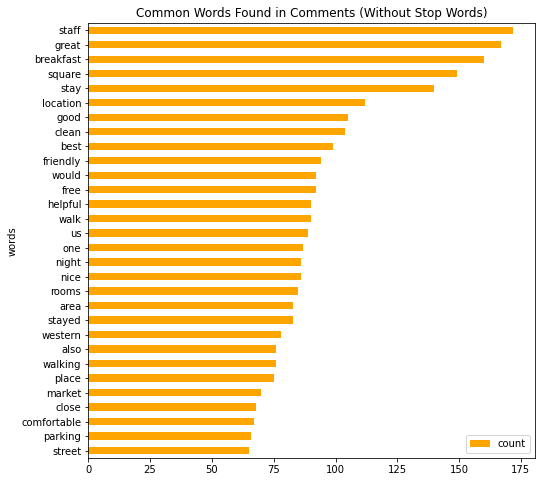

In [42]:
clean_words = pd.DataFrame(counts_all.most_common(30),
                             columns=['words', 'count'])
#clean_words

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_words.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orange")

ax.set_title("Common Words Found in Comments (Without Stop Words)")

plt.show()

### Isolating reviews with specific words to analyze

Selecting only reviews with the word <b>'staff</b>

In [56]:
select_comments = []
for comment in comments:
    temp = comment.lower()
    if 'staff' in temp:
        select_comments.append(temp)

len(select_comments)
select_comments
     

145

['we enjoyed the best western pioneer square  my husband and i had a room with a king bed and it was clean  quiet  and attractive  our sons were in a room with twin beds  their room was in the corner on the main street and they said it was a little noisier and the neon light shone in  but later hotels on the trip made them appreciate this one more  we loved the old wood center staircase  breakfast was included and everyone was happy with waffles  toast  cereal  and an egg meal  location was great  we could walk to shops and restaurants as well as transportation  pike market was a reasonable walk  we enjoyed the nearby gold rush museum  very  very happy with our stay  staff was helpful and knowledgeable ',
 'great visit to seattle thanks to our stay at the best western pioneer square  the hotel was reasonably priced and close to everything we wanted to see   ferry ride  underground tour  klondike museum  short walk to pike market and other shopping  the staff was amazingly helpful and a

### Using TextBlob for sentiment analysis

In [57]:
comment_sent_pol = [TextBlob(review).sentiment.polarity for review in select_comments]
comment_sent_pol[:10]

[0.39714912280701753,
 0.34239583333333334,
 0.32708333333333334,
 0.10261111111111113,
 0.4734568903318903,
 0.31203703703703706,
 0.16383333333333336,
 0.31614583333333335,
 0.24506666666666668,
 0.1331547619047619]

In [58]:
len(comment_sent_pol)

145

Let us see how the sentiment polarity are distributed.  With `staff` being mentioned so many times, the Best Western management wants to know if the comments are more positive or negative.

(array([ 4.,  9., 18., 16., 28., 26., 18., 12., 10.,  4.]),
 array([0.00506536, 0.06407734, 0.12308932, 0.18210131, 0.24111329,
        0.30012527, 0.35913725, 0.41814924, 0.47716122, 0.5361732 ,
        0.59518519]),
 <BarContainer object of 10 artists>)

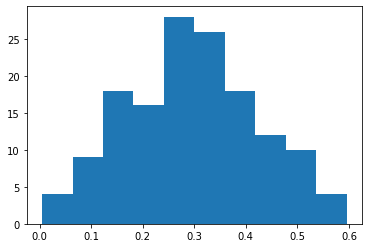

In [59]:
plt.hist(comment_sent_pol)

As seen on the histogram, all comments have a polarity above zero with some above 0.5. Even though there are no negative polarity scores, most lie between 0.1 and 0.5 indicating mostly neutral reviews.

<div class="alert alert-block alert-success"><b>7</b>:  
    
Isolating the comments containing at least one instance of the word <b>'comfortable'</b>. 
1. Saving the comments to a list.
2. Creating a histogram to display the distribution of the average polarities. 
3. Interpreting the results.

</div>

In [60]:
select_comments = []
for i in comments:
    adj_comm = re.sub("[^a-zA-Z\d\s:]", " ", i.lower())
    if 'comfortable' in adj_comm:
        select_comments.append(adj_comm)





(array([ 3.,  5., 10., 12., 17., 13.,  5.,  1.,  0.,  1.]),
 array([0.00506536, 0.07522549, 0.14538562, 0.21554575, 0.28570588,
        0.35586601, 0.42602614, 0.49618627, 0.56634641, 0.63650654,
        0.70666667]),
 <BarContainer object of 10 artists>)

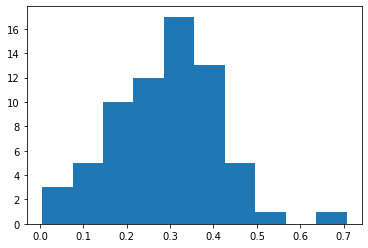

In [62]:
#Showing histogram
another_comment_sent_pol = [TextBlob(adj_comm).sentiment.polarity for adj_comm in select_comments]
plt.hist(another_comment_sent_pol)

In [63]:
#Interpreting the results. 
print("The polarity score is mostly neutral.")

The polarity score is mostly neutral.


Obtaining the review ratings for `Cleanliness`

In [64]:
ratings = []
for review in hotel_data['Reviews']:
    if "Cleanliness" in review['Ratings'] :
        ratings.append(int(review['Ratings']['Cleanliness'])) # convert '1' to 1, etc.
len(ratings)
print(f"The average 'Cleanliness' ratings of the reviews is {mean(ratings)}")

218

The average 'Cleanliness' ratings of the reviews is 4.6422018348623855


Average `Cleanliness` rating is close to the highest possible `Cleanliness` rating and `clean` is a common word in the reviews. So might expect that the average of the sentiment polarities of the sentences in the reviews that contain `clean` as a substring to be "positive as well, i.e. above 0.5. Testing this out using  `TextBlob(comment).sentences` to get the list of sentences in the review.

In [65]:
# createing a list to hold the polarities of all the sentences in the reviews that contain "clean"
ratings = []
clean_sent_pols = []
for review in hotel_data['Reviews']:
    comment = review['Content'].lower()
    if "Cleanliness" in review['Ratings'] and "clean" in comment:
        ratings.append(int(review['Ratings']['Cleanliness']))
        # listing to hold polarity of *all* sentence in the review that contain "clean" 
        for sentence in TextBlob(comment).sentences:
            if "clean" in sentence:
                # appending polarity of each sentence containing "clean"
                clean_sent_pols.append(sentence.polarity)  

print(f"The average 'Cleanliness' rating of the reviews is {mean(ratings)}")
print(f"The average polarity of the sentences containing 'clean' is {mean(clean_sent_pols)}")

The average 'Cleanliness' rating of the reviews is 4.797752808988764
The average polarity of the sentences containing 'clean' is 0.351968648989899


That does not really tell us anything. Instead, for each review that contains a `Cleanliness` rating and sentences containing `clean`, we save the `Cleanliness` rating and the average polarity of these sentences to two separate lists so that we can compare their values.

In [66]:
# creating a list to hold the average polarities of the sentences in the review that contain "clean"
ratings = []
avg_clean_pols = []
for review in hotel_data['Reviews']:
    comment = review['Content'].lower()
    if "Cleanliness" in review['Ratings'] and "clean" in comment:
        ratings.append(int(review['Ratings']['Cleanliness']))
        # listing to hold polaity of *all* sentence in the review that contain "clean"
        sent_pols = []   
        for sentence in TextBlob(comment).sentences:
            if "clean" in sentence:
                # appending polarity of each sentence containing "clean"
                sent_pols.append(sentence.polarity)  
        avg_pol = mean(sent_pols)       # the average polarity of these sentences in the review
        avg_clean_pols.append(avg_pol)  # save this average to compare it to the "Cleanliness"

# avg_clean_pols[:10]

len(ratings)
print(f"The average 'Cleanliness' rating of the reviews is {mean(ratings)}")
print(f"The average clean' rating of the reviews is {mean(avg_clean_pols)}")

89

The average 'Cleanliness' rating of the reviews is 4.797752808988764
The average clean' rating of the reviews is 0.3477343776178046


Creating a side-by-side boxplot to visualize the range of values for each rating.

<AxesSubplot:xlabel='rating', ylabel='polarity'>

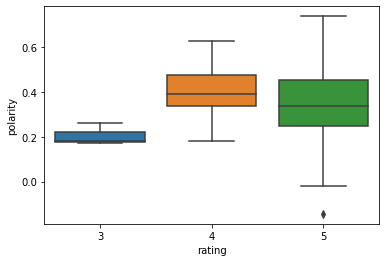

In [67]:
df = pd.DataFrame(zip(ratings,avg_clean_pols),columns = ['rating','polarity'])
sns.boxplot(data=df,x='rating',y='polarity') 

Iterating over all the reviews and creating a side by side box plot of each of the 5 ratings to show the range of values for each rating. 

</div>

In [68]:
import nltk
#nltk.download('punkt')
from textblob import TextBlob
pol_data = []
serv_rating_data = []
import string
punct=string.punctuation
# Iterating over all the reviews to build the lists 'pol_data' and 'serv_rating_data'
for review in reviews:
# Finding the reviews that contain both a "Service" rating and the word "staff" 
    review_lower = review["Content"].lower()
    if "staff" in review_lower and "Service" in review['Ratings']:
        rating = int(review['Ratings']['Service'])
# Saving them to the list 'serv_rating_data'
        serv_rating_data.append(rating)
# Finding the polarity of each sentence then find the averages and save them to 'pol_data'
        polarity=[]  
        for sentence in TextBlob(review_lower).sentences:
            if "staff" in sentence:
                polarity.append(sentence.polarity)  
        average_polarity=mean(polarity)
        pol_data.append(average_polarity)

        
# Verifying 'pol_data' and 'serv_rating_data' each have a length of 138.
len(pol_data)
len(serv_rating_data)
    

138

138

<AxesSubplot:xlabel='rating', ylabel='polarity'>

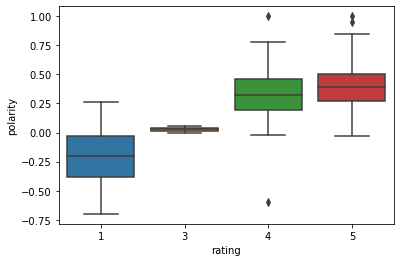

In [55]:
# Creating a side by side box plot of each of the ratings
df = pd.DataFrame(zip(pol_data,serv_rating_data),columns = ['polarity','rating'])
sns.boxplot(data=df,x='rating',y='polarity') 